# **Prediction using Unsupervised ML**
This is a part of GRIPS MAY2021 Internship Program

Task 2

Data set : https://bit.ly/3kXTdox

### To predict the optimum number of clusters and represent it visually using Iris dataset 


---


# *By : Adarssh P N*





In [1]:
#importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

##Loading the Iris Dataset

In [2]:
#displaying the data
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Finding the optimal number of clusters

In [3]:
# Finding the optimum number of clusters for k-means classification
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Plotting a straight line graph

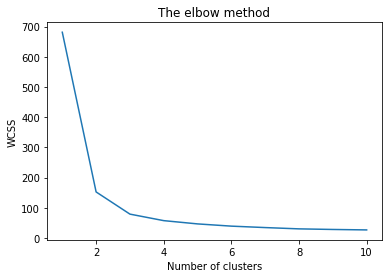

In [4]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

The name 'elbow method' was derived by the graph above, which shows an elbow like pattern. 

The optimum clusters can be noticed where the elbow occurs. And this is the region where the WCSS(within cluster sum of sqaures) does not decrease rapidly with iteration.

Here we choose the number of clusters as 3

##Creating K-Means Classifier

In [5]:
# Applying kmeans to the dataset 
# Creating the kmeans classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

##Visualizing the cluster data

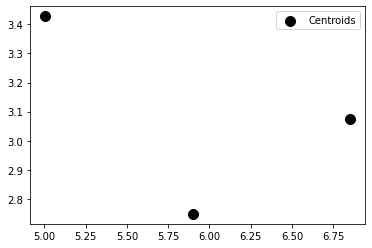

In [7]:
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()

##Overlapping the Centroids over the cluster


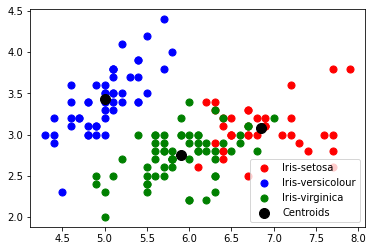

In [10]:


# Visualising the clusters 
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')

# Plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()